## 📊 Initiation au Traitement des Données avec Python  

### 🖥️ Introduction

- Langage Python très populaire en Data Science
- Librairies utilisées :
  - **Pandas** – manipulation de données
  - **NumPy** – opérations numériques
  - **Seaborn / Matplotlib** – visualisation
- Objectifs :
  - Charger et explorer des données
  - Nettoyer et transformer
  - Calculer des statistiques
  - Visualiser simplement


### 🧮 Fonctions utiles en Python pur : `map()` et `filter()`

**`map(function, iterable)`** – applique une fonction à chaque élément d’un itérable.

```python
list(map(lambda x: x*2, [1, 2, 3]))  # ➜ [2, 4, 6]
```

**`filter(function, iterable)`** – garde les éléments pour lesquels la fonction retourne `True`.

```python
list(filter(lambda x: x % 2 == 0, [1, 2, 3, 4]))  # ➜ [2, 4]
```

👉 Ces outils sont très utiles aussi dans **Pandas** (`apply`, `map`) !


### 🐼 Pandas – manipulation de tableaux (dataframe)

|    | nom     |   âge | ville     |   salaire |
|---:|:--------|------:|:----------|----------:|
|  0 | Alice   |    25 | Paris     |     35000 |
|  1 | Bob     |    34 | Lyon      |     42000 |
|  2 | Charlie |    17 | Paris     |     22000 |
|  3 | David   |    62 | Marseille |     55000 |
|  4 | Eve     |    29 | Lyon      |     38000 |

### 🐼 Pandas – La base

**Importer pandas**

```python
import pandas as pd
```

**Charger un fichier CSV**

```python
df = pd.read_csv('donnees.csv')
```

**Afficher les premières lignes**

```python
df.head()
```

**Structure du DataFrame**

```python
df.info()   # Infos générales
df.describe()  # Statistiques descriptives
```

### 🔍 Filtrer avec `filter` et conditions

**Filtrer par colonne**

```python
df[['nom', 'âge']]
```

**Filtrer par ligne (condition)**

```python
df[df['âge'] > 30]
```

**Plusieurs conditions**

```python
df[(df['âge'] > 30) & (df['ville'] == 'Paris')]
```

### 🔁 Transformer avec `map` et `apply`

**Créer une nouvelle colonne**

```python
df['année_naissance'] = 2025 - df['âge']
```

**Utiliser `map()` pour modifier une colonne**

```python
df['ville'] = df['ville'].map({'Paris': 'FR', 'Lyon': 'FR', 'Berlin': 'DE'})
```

**Utiliser `apply()` pour appliquer une fonction**

```python
def categorie_age(age):
    if age < 18: return 'Mineur'
    elif age < 60: return 'Adulte'
    else: return 'Senior'

df['catégorie'] = df['âge'].apply(categorie_age)
```

### 🧮 Calculs statistiques simples

**Statistiques de base**

```python
df['âge'].mean()     # Moyenne
df['âge'].median()   # Médiane
df['âge'].std()      # Écart-type
df['âge'].min(), df['âge'].max()
```

**Grouper et agréger (`groupby`)**
```python
df.groupby('ville')['âge'].mean()
```

```python
df.groupby('ville').agg({
    'âge': ['mean', 'median', 'count'],
    'salaire': 'mean'
})
```

### 🎨 Visualisation avec Seaborn

**Importer seaborn et matplotlib**

```python
import seaborn as sns
import matplotlib.pyplot as plt
```

**Histogramme**

```python
sns.histplot(df['âge'], bins=10)
plt.show()
```


### 🎨 Visualisation avec Seaborn

**Boxplot**

```python
sns.boxplot(x='ville', y='âge', data=df)
plt.show()
```

**Nuage de points**

```python
sns.scatterplot(x='âge', y='salaire', data=df)
plt.show()
```

**Corrélation (heatmap)**

```python
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.show()
```

### 📌 Bonus : Exemple complet rapide

```python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv('personnes.csv')

# Ajouter une colonne
df['année_naissance'] = 2025 - df['âge']

# Filtrer
df_paris = df[df['ville'] == 'Paris']

# Statistique
print("Âge moyen à Paris :", df_paris['âge'].mean())

# Visualisation
sns.histplot(df_paris['âge'], bins=10)
plt.title("Répartition des âges à Paris")
plt.show()
```

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Créons un DataFrame fictif
data = {
    'nom': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace',
            'Hugo', 'Inès', 'Julien', 'Yasmina'],
    'âge': [25, 34, 17, 62, 29, 45, 30, 16, 38, 55, 40],
    'ville': ['Paris', 'Lyon', 'Paris', 'Marseille', 'Lyon', 'Paris',
            'Marseille', 'Paris', 'Lyon', 'Marseille', 'Rabat'],
    'salaire': [35000, 42000, 22000, 55000, 38000, 47000, 36000, 20000,
                41000, 52000, 39000],
}

df = pd.DataFrame(data)

In [2]:
df.head()
# Affiche les 5 premières lignes du DataFrame

,nom,âge,ville,salaire
0,Alice,25,Paris,35000
1,Bob,34,Lyon,42000
2,Charlie,17,Paris,22000
3,David,62,Marseille,55000
4,Eve,29,Lyon,38000


In [3]:
# Filtrer par âge
mineurs = df[df['âge'] < 18]
print(mineurs)

       nom  âge  ville  salaire
2  Charlie   17  Paris    22000
7     Hugo   16  Paris    20000


In [4]:
# Plusieurs conditions
paris_adultes = df[(df['âge'] >= 18) & (df['ville'] == 'Paris')]
print(paris_adultes)

     nom  âge  ville  salaire
0  Alice   25  Paris    35000
5  Frank   45  Paris    47000


In [7]:
# Ajouter une colonne
df['année_naissance'] = 2025 - df['âge']
df.head()

,nom,âge,ville,salaire,année_naissance
0,Alice,25,Paris,35000,2000
1,Bob,34,Lyon,42000,1991
2,Charlie,17,Paris,22000,2008
3,David,62,Marseille,55000,1963
4,Eve,29,Lyon,38000,1996


In [9]:
# Mapper les villes vers des pays
df['pays'] = df['ville'].map({'Paris': 'France', 
                              'Lyon': 'France', 'Marseille': 'France',
                              'Rabat': 'Maroc'})
print(df[['ville', 'pays']])

        ville    pays
0       Paris  France
1        Lyon  France
2       Paris  France
3   Marseille  France
4        Lyon  France
5       Paris  France
6   Marseille  France
7       Paris  France
8        Lyon  France
9   Marseille  France
10      Rabat   Maroc


In [8]:
# Catégoriser l'âge
def categorie_age(age):
    if age < 18: return 'Mineur'
    elif age < 60: return 'Adulte'
    else: return 'Senior'

df['catégorie'] = df['âge'].apply(categorie_age)
print(df[['nom', 'âge', 'catégorie']])

        nom  âge catégorie
0     Alice   25    Adulte
1       Bob   34    Adulte
2   Charlie   17    Mineur
3     David   62    Senior
4       Eve   29    Adulte
5     Frank   45    Adulte
6     Grace   30    Adulte
7      Hugo   16    Mineur
8      Inès   38    Adulte
9    Julien   55    Adulte
10  Yasmina   40    Adulte


In [19]:
# Statistiques générales
print(df.describe())

             âge       salaire  année_naissance
count  11.000000     11.000000        11.000000
mean   35.545455  38818.181818      1989.454545
std    14.514569  10851.895519        14.514569
min    16.000000  20000.000000      1963.000000
25%    27.000000  35500.000000      1982.500000
50%    34.000000  39000.000000      1991.000000
75%    42.500000  44500.000000      1998.000000
max    62.000000  55000.000000      2009.000000


In [20]:
# Moyenne des salaires à Paris
moyenne_salaire_paris = df[df['ville'] == 'Paris']['salaire'].mean()
print("Salaire moyen à Paris :", moyenne_salaire_paris)

Salaire moyen à Paris : 31000.0


In [21]:
# Grouper par ville
stats_par_ville = df.groupby('ville').agg({
    'âge': ['mean', 'median', 'count'],
    'salaire': 'mean'
})
print(stats_par_ville)

                 âge                    salaire
                mean median count          mean
ville                                          
Lyon       33.666667   34.0     3  40333.333333
Marseille  49.000000   55.0     3  47666.666667
Paris      25.750000   21.0     4  31000.000000
Rabat      40.000000   40.0     1  39000.000000


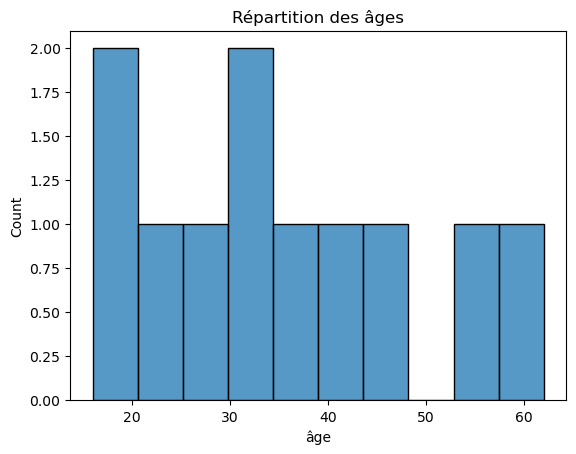

In [22]:
# Histogramme des âges
sns.histplot(df['âge'], bins=10)
plt.title("Répartition des âges")
plt.show()

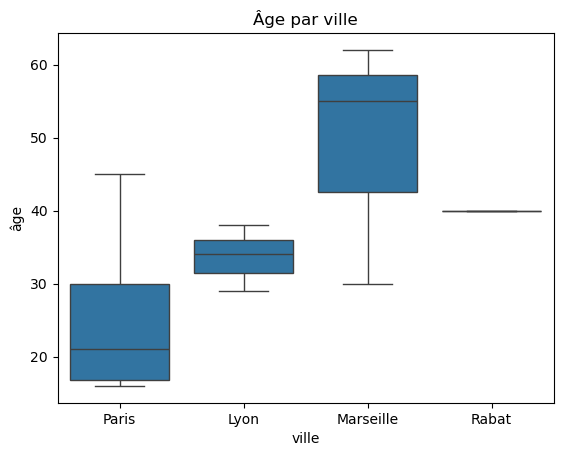

In [23]:
# Boxplot des âges par ville
sns.boxplot(x='ville', y='âge', data=df)
plt.title("Âge par ville")
plt.show()


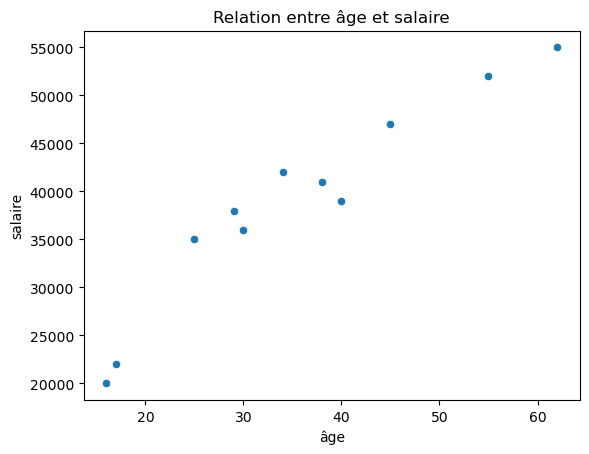

In [24]:
# Nuage de points âge vs salaire
sns.scatterplot(x='âge', y='salaire', data=df)
plt.title("Relation entre âge et salaire")
plt.show()

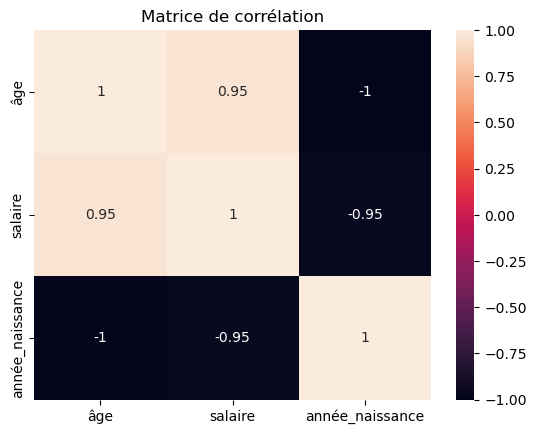

In [25]:
# Corrélation
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True)
plt.title("Matrice de corrélation")
plt.show()